<a href="https://colab.research.google.com/github/Mallikarjun1235/Customer_prediction_Customer/blob/main/potential_Customer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> Problem statement

Goal is to create an AI/ML system that 
accurately identifies potential customers based on the characteristics and activities 
which they have recorded from the survey.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
PATH='/content/gdrive/MyDrive/capstone'
os.chdir(PATH)

In [ ]:
!ls

 capstone.ipynb		        CustomerPotential_testdatawithTarget.xlsx
 CAPSTONE_PROJECT_FINAL.ipynb   CustomerPotential_traindata1.xlsx
 capstone_project.ipynb         Logistic.pkl
'Customer Behaviour_01.xlsx'   'Potential customer prediction.pdf'
'Customer Behaviour_02.xlsx'


<h2>Read Data</h2>
<p>
We use <code>pandas.read_excel()</code> function to read the csv file. In the brackets, we put the file path along with a quotation mark so that pandas will read the file into a dataframe from that address. The file path can be either an URL or your local file address.<br>


In [ ]:
t1 = pd.read_excel('CustomerPotential_traindata1.xlsx')

In [ ]:
t2 = pd.read_excel('Customer Behaviour_01.xlsx')
t3 = pd.read_excel('Customer Behaviour_02.xlsx')

In [ ]:
d2 = t2.copy()
d3 = t3.copy()

In [ ]:
d2= d2.sort_values('people_id')
d3= d3.sort_values('people_id')

<h2> Exploratory Data Analysis

<h1 id="basic_insight">Basic Insight of Dataset</h1>
<p>
After reading data into Pandas dataframe, it is time for us to explore the dataset.<br>

There are several ways to obtain essential insights of the data to help us better understand our dataset.

</p>

In [ ]:
t1 = t1.rename(columns = {'Peopleid':'people_id'})

In [ ]:
t1.head()

,Unnamed: 0,people_id,Target
0,38270,ppl_190785,0
1,30017,ppl_171219,1
2,31211,ppl_174140,0
3,61411,ppl_245388,1
4,1341,ppl_103150,1


In [ ]:
t1 = t1.drop(['Unnamed: 0'],axis =1) # Dropping Unnamed:0 

In [ ]:
t1 = t1.sort_values('people_id')

In [ ]:
t1.head()

,people_id,Target
50437,ppl_100,0
23938,ppl_100002,1
46940,ppl_100003,1
41645,ppl_100013,1
33302,ppl_100025,0


In [ ]:
t1.tail()

,people_id,Target
41510,ppl_277716,0
30496,ppl_277720,1
16454,ppl_277722,1
24027,ppl_277739,0
20936,ppl_277743,1


In [ ]:
t1.nunique()

people_id    60061
Target           2
dtype: int64

<h2>Shape 

<h4> It provides the dimension of the dataset i.e. how many rows and columns are there in dataset 

In [ ]:
t1.shape

(60061, 2)

In [ ]:
t1 = t1.drop_duplicates()

In [ ]:
t1.nunique()

people_id    60061
Target           2
dtype: int64

In [ ]:
t1['people_id'].value_counts()

ppl_100       1
ppl_218386    1
ppl_218349    1
ppl_218355    1
ppl_218362    1
             ..
ppl_159448    1
ppl_159450    1
ppl_159454    1
ppl_159455    1
ppl_277743    1
Name: people_id, Length: 60061, dtype: int64

In [ ]:
t1.shape

(60061, 2)

## Customer Behaviour_01

In [ ]:
d2.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1


In [ ]:
d2.shape

(1048575, 14)

In [ ]:
d2.nunique()

people_id              75077
activity_id          1048575
date                     411
activity_category          7
char_1                    50
char_2                    32
char_3                    11
char_4                     7
char_5                     6
char_6                     5
char_7                     8
char_8                    18
char_9                    19
char_10                 5234
dtype: int64

In [ ]:
d2 = d2.drop(['activity_id','date'],axis =1)

In [ ]:
d2 = d2.drop_duplicates()

In [ ]:
d2.nunique()

people_id            75077
activity_category        7
char_1                  50
char_2                  32
char_3                  11
char_4                   7
char_5                   6
char_6                   5
char_7                   8
char_8                  18
char_9                  19
char_10               5234
dtype: int64

In [ ]:
d2.describe().T

,count,unique,top,freq
people_id,248868,75077,ppl_250020,546
activity_category,248868,7,type 1,64029
char_1,64029,50,type 2,12897
char_2,64029,32,type 2,18207
char_3,64029,11,type 1,15481
char_4,64029,7,type 3,36124
char_5,64029,6,type 6,28350
char_6,64029,5,type 2,24122
char_7,64029,8,type 1,22905
char_8,64029,18,type 4,28157


In [ ]:
d2.isna().sum()

people_id                 0
activity_category         0
char_1               184839
char_2               184839
char_3               184839
char_4               184839
char_5               184839
char_6               184839
char_7               184839
char_8               184839
char_9               184839
char_10               64029
dtype: int64

## Checking percentage of null value for Customer Behavioural dataset -1

In [ ]:
null_df = pd.DataFrame({'Null Values' : d2.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (d2.isna().sum().sort_values(ascending=False)) 
/ (d2.shape[0]) * (100)})


In [ ]:
null_df

,Null Values,Percentage Null Values
char_1,184839,74.271903
char_2,184839,74.271903
char_3,184839,74.271903
char_4,184839,74.271903
char_5,184839,74.271903
char_6,184839,74.271903
char_7,184839,74.271903
char_8,184839,74.271903
char_9,184839,74.271903
char_10,64029,25.728097


In [ ]:
d2.shape

(248868, 12)

In [ ]:
d2.head()

,people_id,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10
0,ppl_100,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76
1,ppl_100,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1
5,ppl_100,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1727
6,ppl_100002,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1
27,ppl_100003,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 276


In [ ]:
d2.tail()

,people_id,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10
1048524,ppl_277743,type 1,type 2,type 10,type 5,type 4,type 6,type 1,type 1,type 5,type 5,NaN
1048525,ppl_277743,type 1,type 2,type 5,type 9,type 3,type 6,type 2,type 2,type 6,type 8,NaN
1048529,ppl_277743,type 1,type 2,type 5,type 5,type 3,type 6,type 2,type 1,type 4,type 8,NaN
1048537,ppl_277743,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1601
1048574,ppl_277743,type 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 2


## Customer Behaviour_02

In [ ]:
d3.head()

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,...,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,...,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,...,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,...,False,False,True,False,False,False,True,True,False,84


In [ ]:
d3.tail()

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
189113,ppl_99987,type 1,group 8600,type 1,2022-04-02,type 4,type 6,type 4,type 3,type 11,...,False,False,False,True,False,True,False,True,True,89
189114,ppl_9999,type 2,group 17304,type 2,2023-02-23,type 6,type 2,type 8,type 3,type 11,...,False,False,False,False,False,False,False,False,False,0
189115,ppl_99992,type 2,group 17304,type 2,2020-06-25,type 5,type 5,type 3,type 4,type 16,...,False,False,False,False,False,False,False,False,False,0
189116,ppl_99994,type 2,group 17764,type 3,2023-01-06,type 2,type 7,type 2,type 1,type 2,...,True,True,True,True,False,True,True,True,True,95
189117,ppl_99997,type 2,group 17304,type 2,2022-03-12,type 40,type 25,type 9,type 3,type 8,...,False,False,False,False,False,False,False,False,False,36


In [ ]:
d3.shape

(189118, 41)

In [ ]:
d3.nunique()

people_id    189118
char_1            2
group_1       34224
char_2            3
date           1196
char_3           43
char_4           25
char_5            9
char_6            7
char_7           25
char_8            8
char_9            9
char_10           2
char_11           2
char_12           2
char_13           2
char_14           2
char_15           2
char_16           2
char_17           2
char_18           2
char_19           2
char_20           2
char_21           2
char_22           2
char_23           2
char_24           2
char_25           2
char_26           2
char_27           2
char_28           2
char_29           2
char_30           2
char_31           2
char_32           2
char_33           2
char_34           2
char_35           2
char_36           2
char_37           2
char_38         101
dtype: int64

In [ ]:
d3 = d3.drop('date',axis =1)

In [ ]:
d3 = d3.drop_duplicates()

In [ ]:
d3['people_id'].value_counts()

ppl_100       1
ppl_339069    1
ppl_339052    1
ppl_339058    1
ppl_339059    1
             ..
ppl_219358    1
ppl_21936     1
ppl_219362    1
ppl_219363    1
ppl_99997     1
Name: people_id, Length: 189118, dtype: int64

In [ ]:
d3.shape

(189118, 40)

In [ ]:
cols = d3.loc[:,'char_10':'char_38']
cols = cols.columns

In [ ]:
d3[cols] = d3[cols].astype(int)

#### Creating Train dataset by merging given train data(people_id, outcome) and customer behaviour_02

In [ ]:
T1 = pd.merge(t1 , d3 , on ='people_id')

In [ ]:
T1.head(20)

,people_id,Target,char_1,group_1,char_2,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,0,type 2,group 17304,type 2,type 5,type 5,type 5,type 3,type 11,...,0,1,1,0,0,1,1,1,0,36
1,ppl_100002,1,type 2,group 8688,type 3,type 28,type 9,type 5,type 3,type 11,...,0,1,1,1,1,1,1,1,0,76
2,ppl_100003,1,type 2,group 33592,type 3,type 4,type 8,type 5,type 2,type 5,...,0,0,1,1,1,1,0,1,1,99
3,ppl_100013,1,type 2,group 4204,type 3,type 4,type 8,type 4,type 1,type 7,...,0,0,1,1,1,1,0,1,1,91
4,ppl_100025,0,type 2,group 36096,type 3,type 14,type 6,type 8,type 3,type 9,...,0,0,0,0,0,0,0,0,0,76
5,ppl_100028,0,type 2,group 17304,type 2,type 40,type 25,type 9,type 4,type 20,...,0,0,0,0,0,0,0,0,0,0
6,ppl_100029,0,type 2,group 17304,type 2,type 4,type 6,type 4,type 1,type 2,...,0,0,0,0,0,0,0,0,0,0
7,ppl_100032,0,type 2,group 18035,type 3,type 7,type 6,type 7,type 4,type 17,...,0,0,0,0,0,0,0,0,0,60
8,ppl_100035,1,type 2,group 9439,type 3,type 4,type 10,type 4,type 1,type 23,...,0,0,0,0,0,0,0,0,1,100
9,ppl_100042,0,type 2,group 7636,type 3,type 40,type 25,type 9,type 6,type 9,...,0,0,0,0,0,0,0,0,0,67


In [ ]:
T1.shape

(60061, 41)

In [ ]:
T1['Target'].value_counts()

0    32882
1    27179
Name: Target, dtype: int64

In [ ]:
T1.nunique()

people_id    60061
Target           2
char_1           2
group_1      16315
char_2           3
char_3          42
char_4          25
char_5           9
char_6           7
char_7          25
char_8           8
char_9           9
char_10          2
char_11          2
char_12          2
char_13          2
char_14          2
char_15          2
char_16          2
char_17          2
char_18          2
char_19          2
char_20          2
char_21          2
char_22          2
char_23          2
char_24          2
char_25          2
char_26          2
char_27          2
char_28          2
char_29          2
char_30          2
char_31          2
char_32          2
char_33          2
char_34          2
char_35          2
char_36          2
char_37          2
char_38        101
dtype: int64

In [ ]:
T1['char_38'].describe().T

count    60061.000000
mean        50.420972
std         35.749427
min          0.000000
25%         10.000000
50%         58.000000
75%         83.000000
max        100.000000
Name: char_38, dtype: float64

In [ ]:
T1.isna().sum()

people_id    0
Target       0
char_1       0
group_1      0
char_2       0
char_3       0
char_4       0
char_5       0
char_6       0
char_7       0
char_8       0
char_9       0
char_10      0
char_11      0
char_12      0
char_13      0
char_14      0
char_15      0
char_16      0
char_17      0
char_18      0
char_19      0
char_20      0
char_21      0
char_22      0
char_23      0
char_24      0
char_25      0
char_26      0
char_27      0
char_28      0
char_29      0
char_30      0
char_31      0
char_32      0
char_33      0
char_34      0
char_35      0
char_36      0
char_37      0
char_38      0
dtype: int64

In [ ]:
to_drop = ['people_id']

In [ ]:
T1.drop(to_drop, axis=1, inplace=True)

In [ ]:
T1.head()

,Target,char_1,group_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,0,type 2,group 17304,type 2,type 5,type 5,type 5,type 3,type 11,type 2,...,0,1,1,0,0,1,1,1,0,36
1,1,type 2,group 8688,type 3,type 28,type 9,type 5,type 3,type 11,type 2,...,0,1,1,1,1,1,1,1,0,76
2,1,type 2,group 33592,type 3,type 4,type 8,type 5,type 2,type 5,type 2,...,0,0,1,1,1,1,0,1,1,99
3,1,type 2,group 4204,type 3,type 4,type 8,type 4,type 1,type 7,type 2,...,0,0,1,1,1,1,0,1,1,91
4,0,type 2,group 36096,type 3,type 14,type 6,type 8,type 3,type 9,type 6,...,0,0,0,0,0,0,0,0,0,76


<h2>Data Types</h2>
<p>
Data has a variety of types.<br>

The main types stored in Pandas dataframes are <b>object</b>, <b>float</b>, <b>int</b>, <b>bool</b> and <b>datetime64</b>. In order to better learn about each attribute, it is always good for us to know the data type of each column. In Pandas:

</p>


In [ ]:
T1.dtypes

Target      int64
char_1     object
group_1    object
char_2     object
char_3     object
char_4     object
char_5     object
char_6     object
char_7     object
char_8     object
char_9     object
char_10     int64
char_11     int64
char_12     int64
char_13     int64
char_14     int64
char_15     int64
char_16     int64
char_17     int64
char_18     int64
char_19     int64
char_20     int64
char_21     int64
char_22     int64
char_23     int64
char_24     int64
char_25     int64
char_26     int64
char_27     int64
char_28     int64
char_29     int64
char_30     int64
char_31     int64
char_32     int64
char_33     int64
char_34     int64
char_35     int64
char_36     int64
char_37     int64
char_38     int64
dtype: object

In [ ]:
cat = ['char_1', 'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7',
       'char_8', 'char_9']

In [ ]:
num = ['char_38']

Copying data to s1 variable for visualization

In [ ]:
s1 = T1.copy()

In [ ]:
s1.head()

,Target,char_1,group_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,0,type 2,group 17304,type 2,type 5,type 5,type 5,type 3,type 11,type 2,...,0,1,1,0,0,1,1,1,0,36
1,1,type 2,group 8688,type 3,type 28,type 9,type 5,type 3,type 11,type 2,...,0,1,1,1,1,1,1,1,0,76
2,1,type 2,group 33592,type 3,type 4,type 8,type 5,type 2,type 5,type 2,...,0,0,1,1,1,1,0,1,1,99
3,1,type 2,group 4204,type 3,type 4,type 8,type 4,type 1,type 7,type 2,...,0,0,1,1,1,1,0,1,1,91
4,0,type 2,group 36096,type 3,type 14,type 6,type 8,type 3,type 9,type 6,...,0,0,0,0,0,0,0,0,0,76


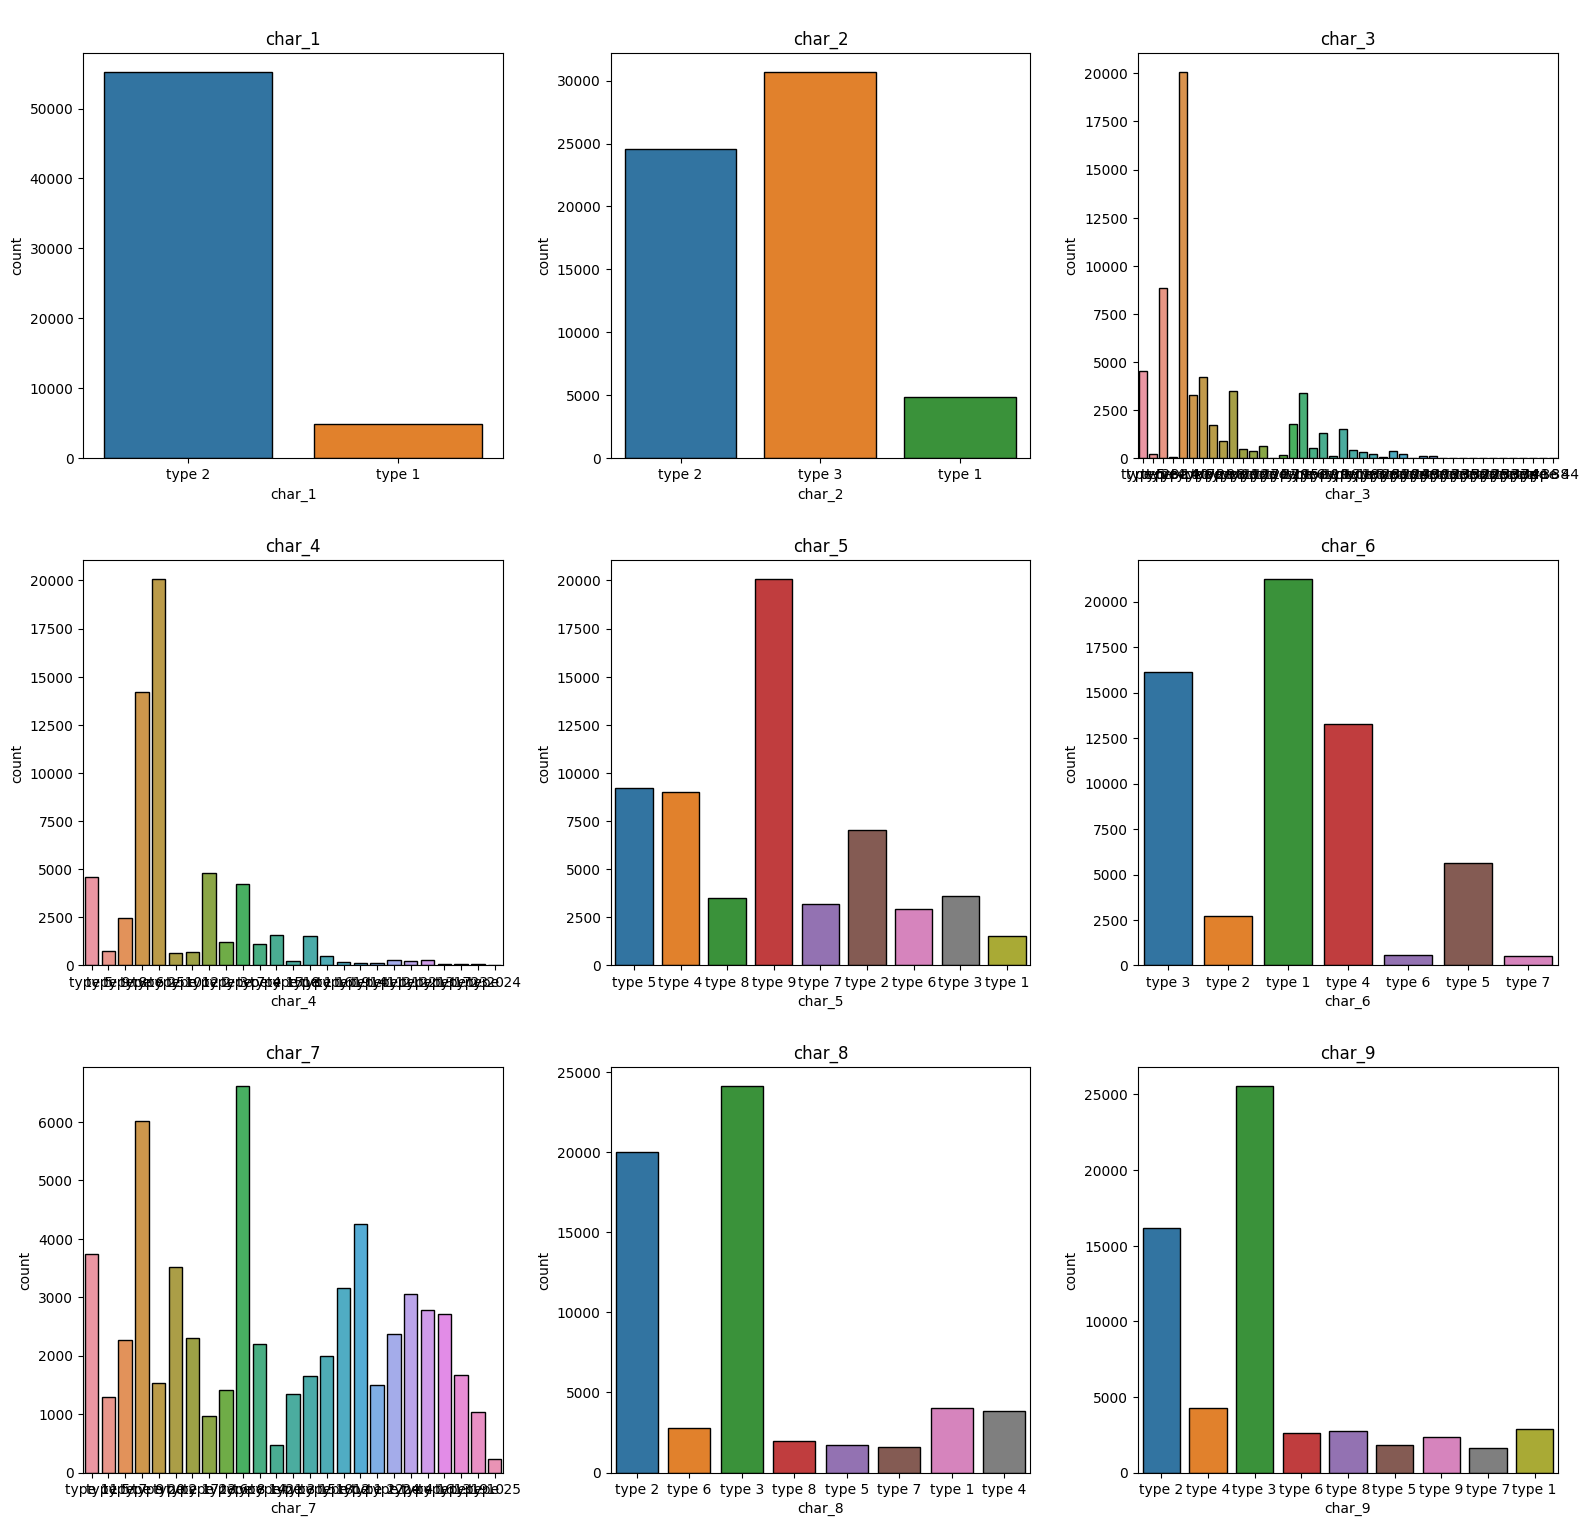

In [ ]:
plt.figure(figsize=(16, 20))
count_plot = 1
for i in range(0, len(cat)):
  if count_plot <= 10:
    ax = plt.subplot(4, 3, count_plot)
    sns.countplot(x=cat[i], data=s1, ax=ax,ec='black')
    plt.title(f"\n{cat[i]}")
  count_plot += 1
plt.tight_layout()
plt.show()


In [ ]:
num1 = ['char_3','char_4','char_7']
num1

['char_3', 'char_4', 'char_7']

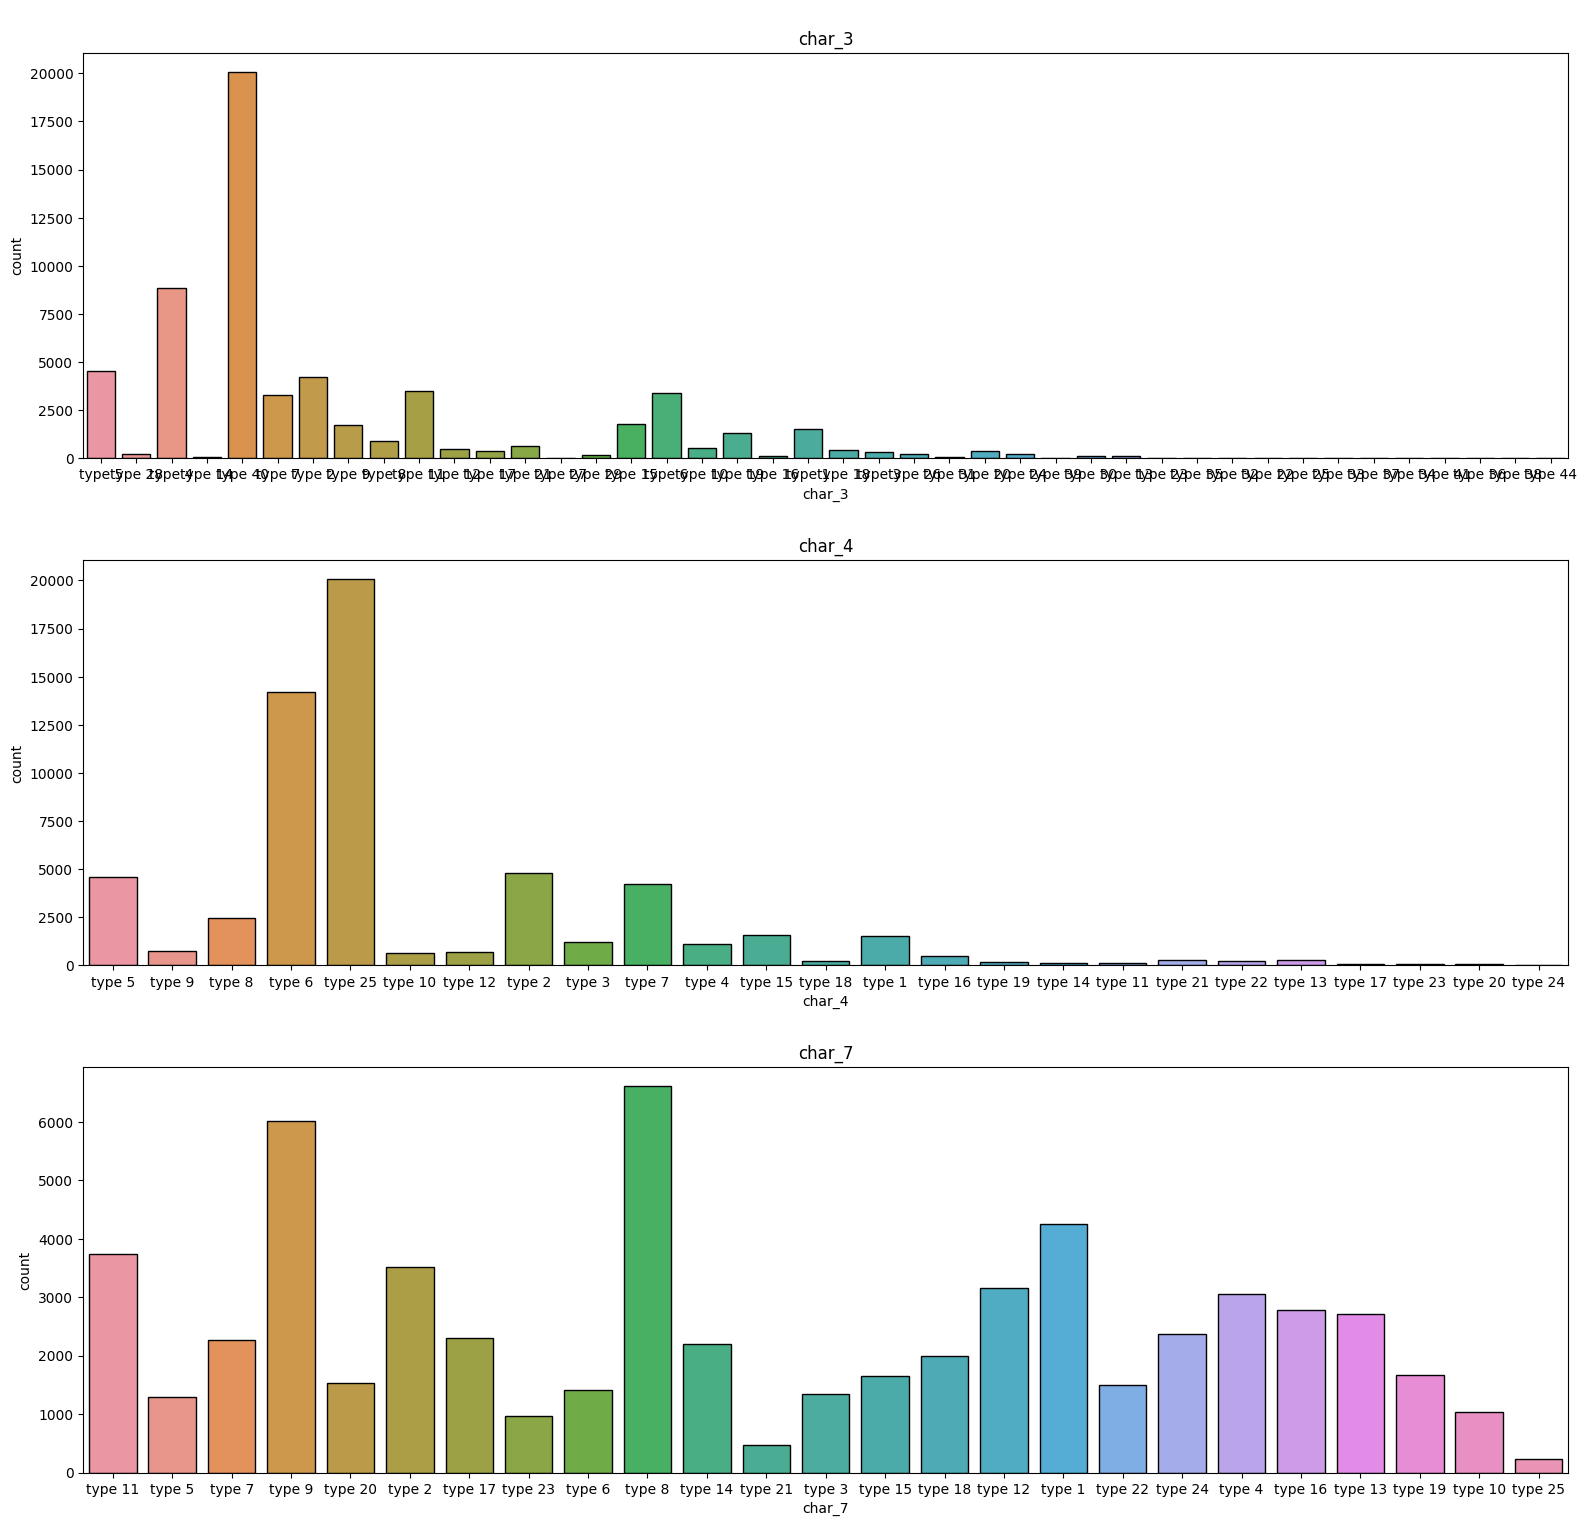

In [ ]:
plt.figure(figsize=(16, 20))
count_plot = 1
for i in range(0, len(num1)):
  if count_plot <= 1000:
    ax = plt.subplot(4, 1, count_plot)
    sns.countplot(x=num1[i], data=s1, ax=ax,ec='black')
    plt.title(f"\n{num1[i]}")
  count_plot += 1
plt.tight_layout()
plt.show()


9


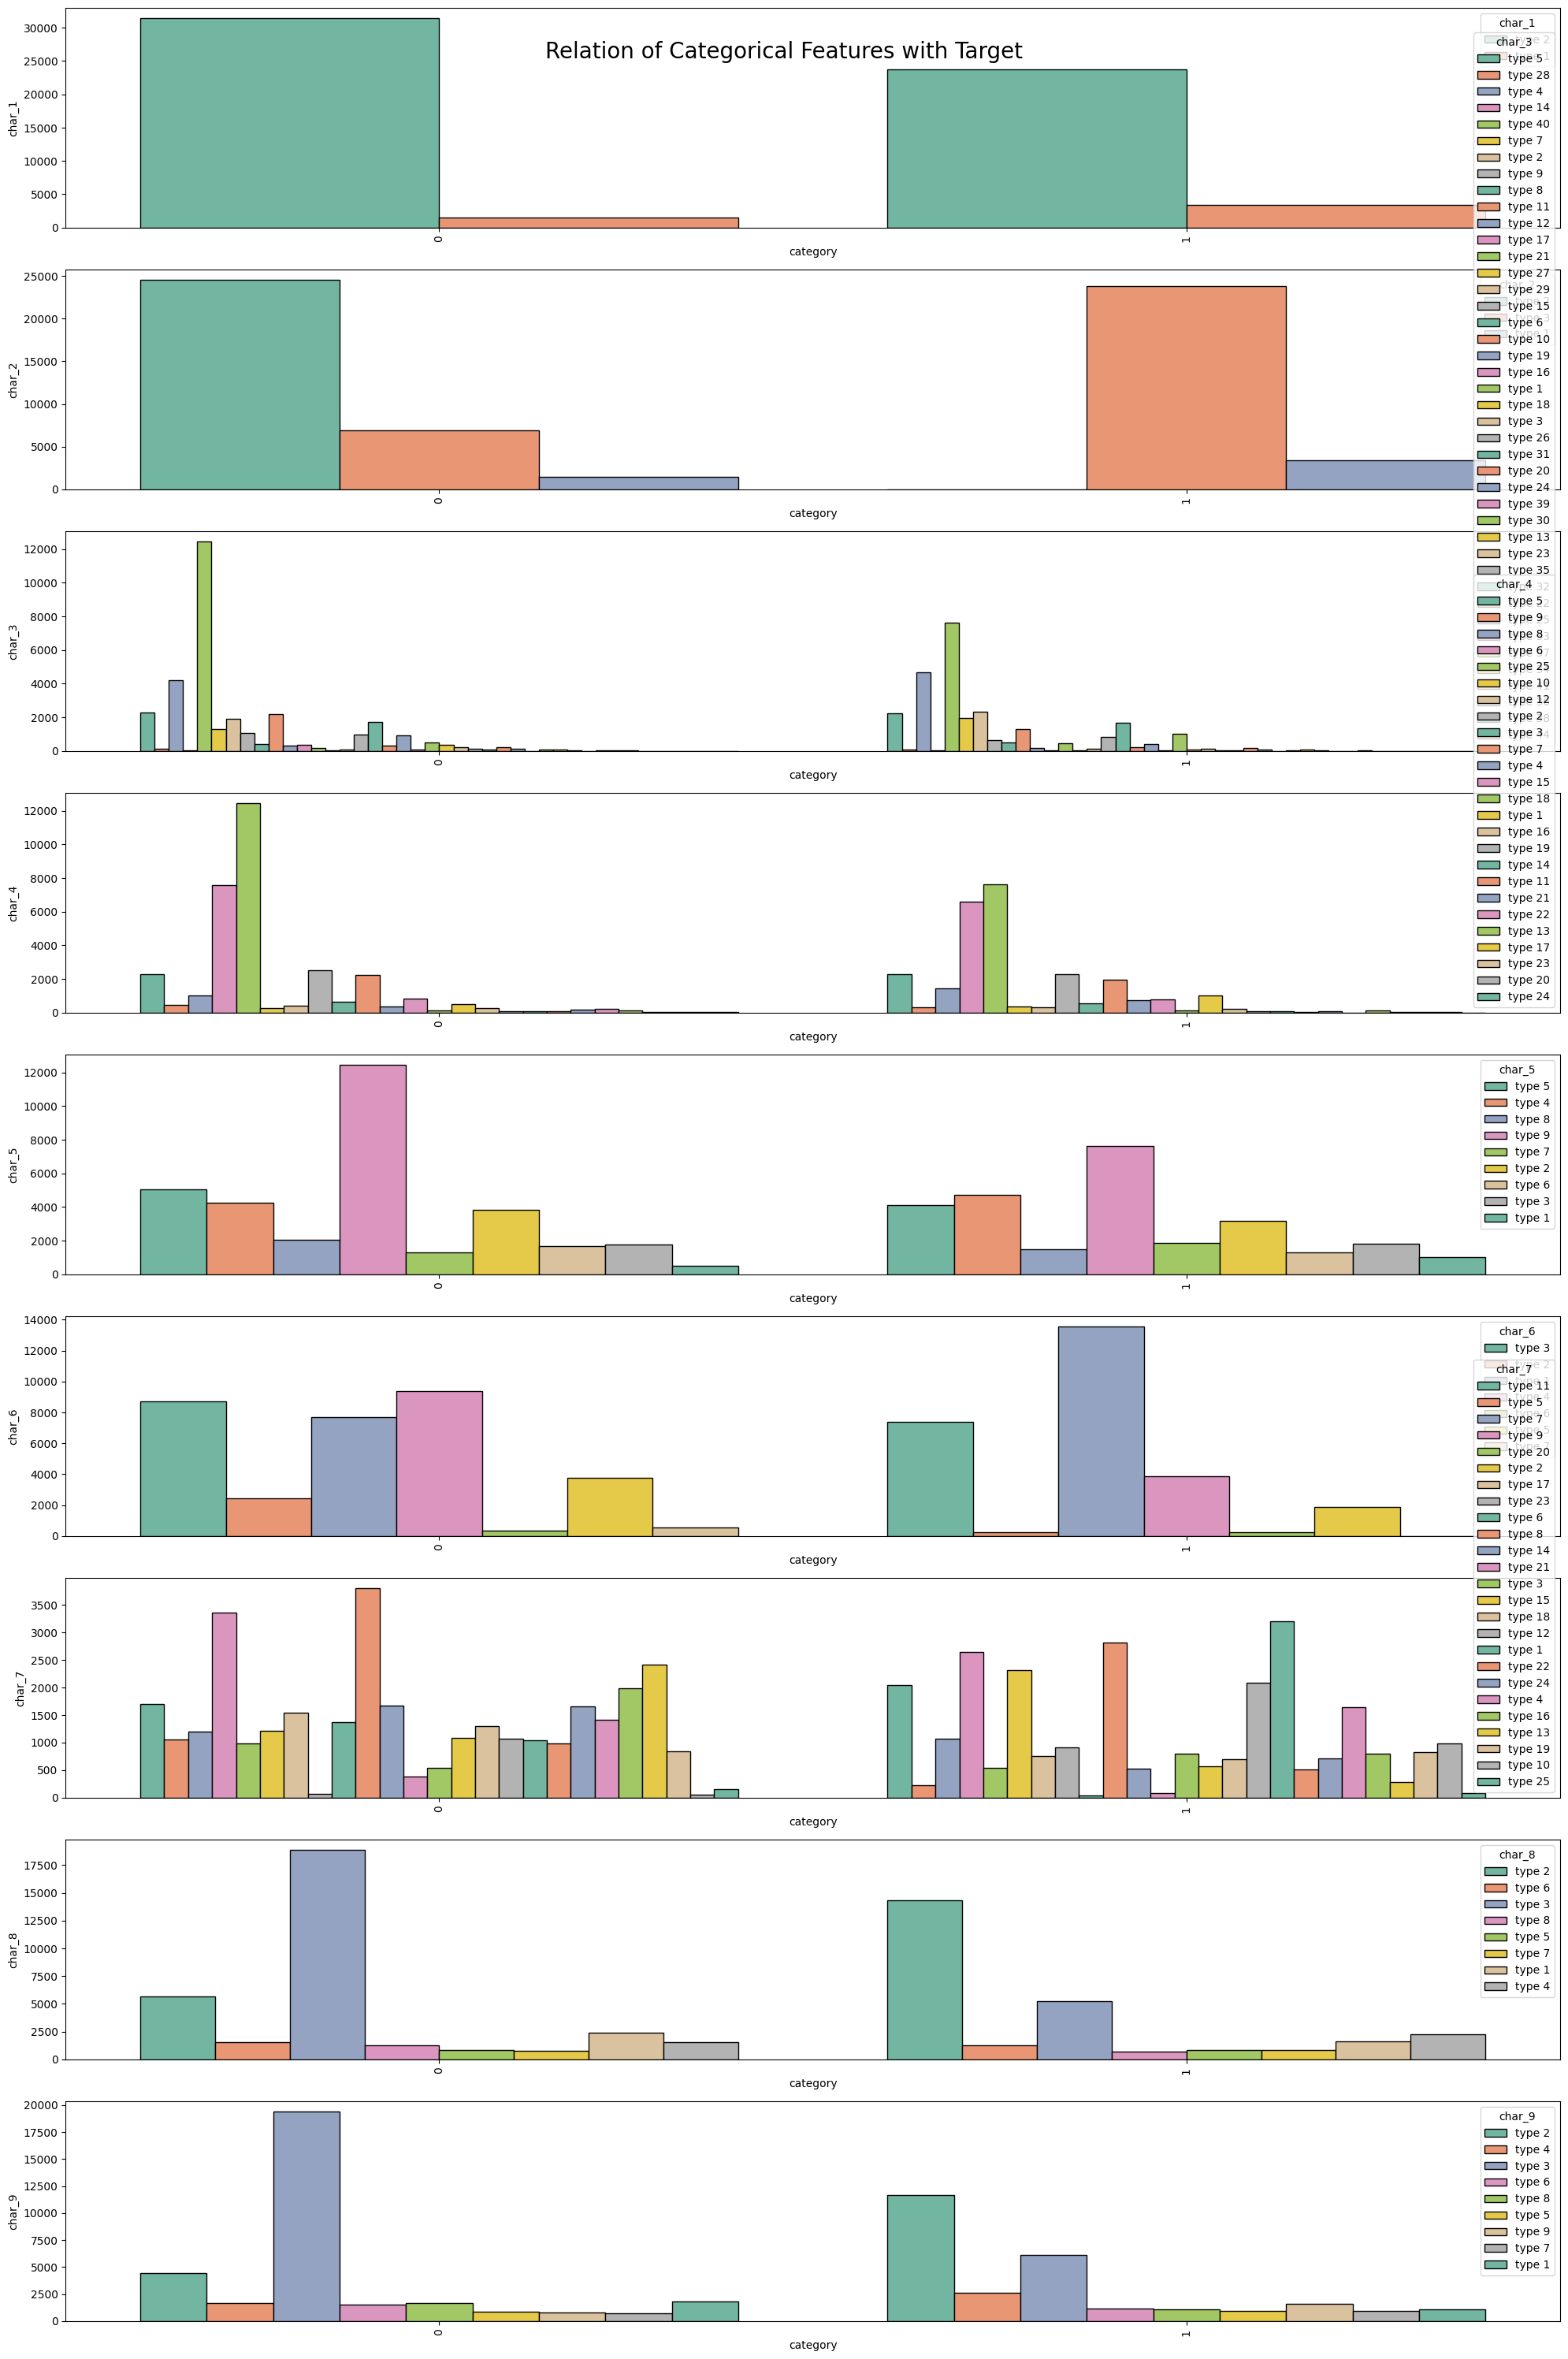

In [ ]:
print(len(cat))
plt.figure(figsize=(20, 50))
plt.suptitle('Relation of Categorical Features with Target', fontsize=20, fontweight=12)
for i in range(0, len(cat)):
    plt.subplot(15, 1, i+1)
    sns.countplot(x=s1['Target'],hue=s1[cat[i]],data=s1,ec='black', palette= 'Set2')
    plt.xlabel('category')
    plt.ylabel(cat[i])
    plt.xticks(rotation=90)
    plt.tight_layout()


In [ ]:
s1['char_38'].value_counts()

0     13138
98     1482
90     1362
95     1057
91     1032
      ...  
8       176
6       175
7       171
5       161
15      158
Name: char_38, Length: 101, dtype: int64

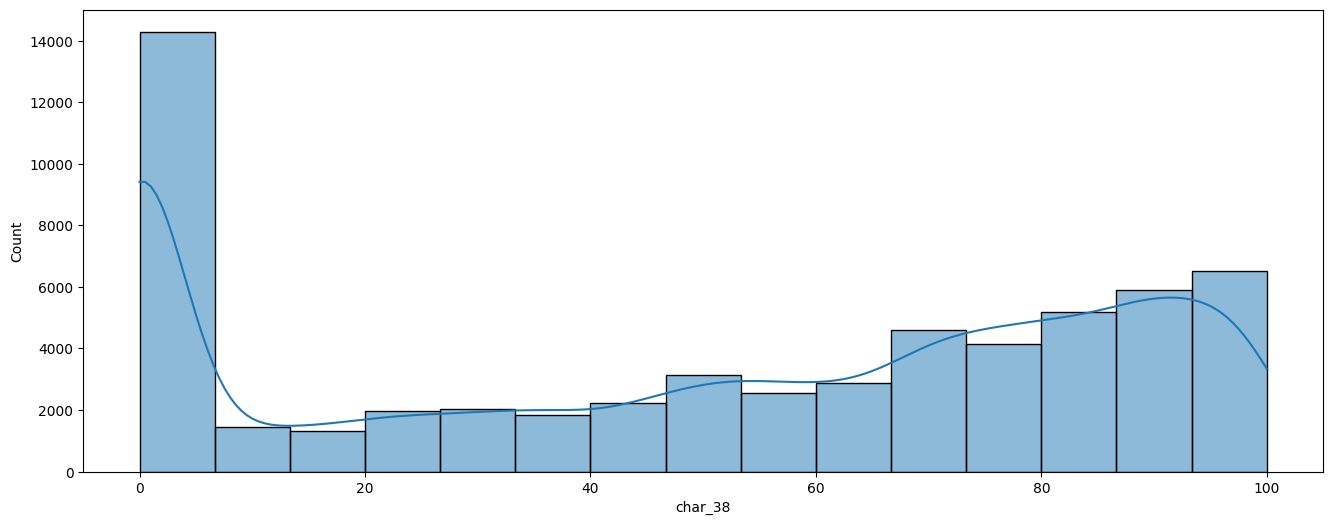

In [ ]:
plt.figure(figsize=(16,6))
sns.histplot(data=s1, x=s1['char_38'], bins=15, kde=True)
plt.show()


{'whiskers': [<matplotlib.lines.Line2D at 0x7f28f4b3d210>,
 'caps': [<matplotlib.lines.Line2D at 0x7f28f4b3d660>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f28f09d2500>],
 'medians': [<matplotlib.lines.Line2D at 0x7f28f4b3dba0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f28f4b3de40>],
 'means': []}

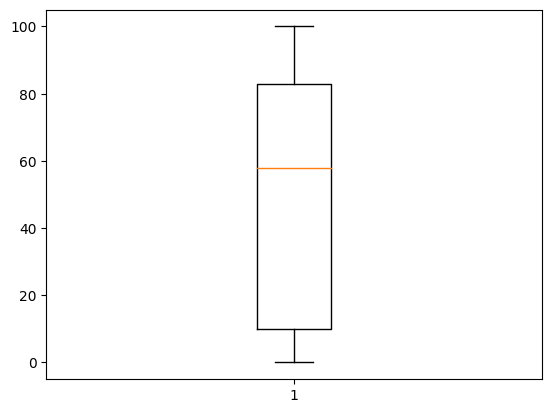

In [ ]:
plt.boxplot(s1['char_38'])

### Group the unique elements in the 'group_1' column based on their frequency,because group_1 has 16315 unique elements(groups) in the columns.

### Considering the groups which occured more than 100 times in the column.

In [ ]:
top_groups = T1['group_1'].value_counts()[T1['group_1'].value_counts() >= 100].index
T1['group_1'] = T1['group_1'].where(T1['group_1'].isin(top_groups), 'Other')

T1['group_1'] = T1['group_1'].astype(str)

In [ ]:
T1.head()

,Target,char_1,group_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,0,type 2,group 17304,type 2,type 5,type 5,type 5,type 3,type 11,type 2,...,0,1,1,0,0,1,1,1,0,36
1,1,type 2,Other,type 3,type 28,type 9,type 5,type 3,type 11,type 2,...,0,1,1,1,1,1,1,1,0,76
2,1,type 2,Other,type 3,type 4,type 8,type 5,type 2,type 5,type 2,...,0,0,1,1,1,1,0,1,1,99
3,1,type 2,Other,type 3,type 4,type 8,type 4,type 1,type 7,type 2,...,0,0,1,1,1,1,0,1,1,91
4,0,type 2,Other,type 3,type 14,type 6,type 8,type 3,type 9,type 6,...,0,0,0,0,0,0,0,0,0,76


In [ ]:
T1['group_1'].value_counts()

Other          33454
group 17304    24532
group 667        541
group 8386       332
group 9280       218
group 450        198
group 1482       154
group 15723      148
group 17899      142
group 3229       124
group 11143      111
group 3598       107
Name: group_1, dtype: int64

In [ ]:
cat_cols = ['char_1', 'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8', 'char_9','group_1']
cat_cols

['char_1',
 'char_2',
 'char_3',
 'char_4',
 'char_5',
 'char_6',
 'char_7',
 'char_8',
 'char_9',
 'group_1']

In [ ]:
bol_cols = T1.loc[:,'char_10':'char_37']
bol_cols = bol_cols.columns
bol_cols

Index(['char_10', 'char_11', 'char_12', 'char_13', 'char_14', 'char_15',
       'char_16', 'char_17', 'char_18', 'char_19', 'char_20', 'char_21',
       'char_22', 'char_23', 'char_24', 'char_25', 'char_26', 'char_27',
       'char_28', 'char_29', 'char_30', 'char_31', 'char_32', 'char_33',
       'char_34', 'char_35', 'char_36', 'char_37'],
      dtype='object')

In [ ]:
T1[cat_cols] = T1[cat_cols].astype('category')

In [ ]:
y = T1['Target']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(T1.loc[:,T1.columns !='Target'],T1.loc[:,'Target'],test_size = 0.3, random_state =123,stratify = y)

In [ ]:
x_train.head()

,char_1,group_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
54079,type 2,Other,type 3,type 40,type 25,type 9,type 1,type 1,type 1,type 1,...,0,0,0,0,0,0,0,0,0,56
50242,type 2,Other,type 3,type 8,type 6,type 8,type 1,type 12,type 2,type 3,...,0,0,0,1,0,1,0,1,1,92
18700,type 2,Other,type 3,type 4,type 6,type 4,type 3,type 11,type 3,type 3,...,0,1,1,0,1,0,0,1,0,87
28378,type 2,Other,type 3,type 40,type 25,type 9,type 3,type 11,type 1,type 8,...,0,0,0,0,0,0,0,0,0,57
27568,type 2,group 17304,type 2,type 40,type 25,type 9,type 4,type 20,type 3,type 3,...,0,0,0,0,0,0,0,0,0,30


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(42042, 39)
(42042,)
(18019, 39)
(18019,)


In [ ]:
x_train.dtypes

char_1     category
group_1    category
char_2     category
char_3     category
char_4     category
char_5     category
char_6     category
char_7     category
char_8     category
char_9     category
char_10       int64
char_11       int64
char_12       int64
char_13       int64
char_14       int64
char_15       int64
char_16       int64
char_17       int64
char_18       int64
char_19       int64
char_20       int64
char_21       int64
char_22       int64
char_23       int64
char_24       int64
char_25       int64
char_26       int64
char_27       int64
char_28       int64
char_29       int64
char_30       int64
char_31       int64
char_32       int64
char_33       int64
char_34       int64
char_35       int64
char_36       int64
char_37       int64
char_38       int64
dtype: object

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

In [ ]:
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')
std = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('num_imputer',num_imputer),
            ('scaler',std)
        ]),num),
        ('cat', Pipeline([
            ('cat_imputer', cat_imputer), 
            ('encoder', ohe) 
        ]), cat_cols),
        ('bool','passthrough',bol_cols)
    ],remainder='drop')

In [ ]:
preprocessor.fit(x_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['char_38']),
                                ('cat',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['char_1', 'char_2', 'char_3', 'char_4',
                                  'char_5', 'char_6', 'char_7', 'char_8',
                                  'char_9', 'group_1']),
                                ('bool', 'passthrough',
                                 Index(['char_10', 'char_11', 'char_12', 'char_13', 'char_14', 'char_15',
       'char_16', 'char_17', 'char_18', 'char_19', 'char_20', 'char_21',
       'char_22', 'char_23', 'char_24', 'char_25', 'char_26', 'char_27',
       'char_28', 'char_29', 'char_30', 'char_31', 'char_32', 'char_33',
       'char_34', 'char_35', 'char_36', 'char_37'],
      dtype='object'))])

In [ ]:
# train = pd.DataFrame(preprocessor.fit_transform(x_train).toarray())
# validation = pd.DataFrame(preprocessor.transform(x_test).toarray())

In [ ]:
Train = pd.DataFrame(preprocessor.fit_transform(x_train).toarray(), columns=preprocessor.get_feature_names_out())
validation = pd.DataFrame(preprocessor.transform(x_test).toarray(), columns=preprocessor.get_feature_names_out())


In [ ]:
Train.head()

,num__char_38,cat__char_1_type 1,cat__char_1_type 2,cat__char_2_type 1,cat__char_2_type 2,cat__char_2_type 3,cat__char_3_type 1,cat__char_3_type 10,cat__char_3_type 11,cat__char_3_type 12,...,bool__char_28,bool__char_29,bool__char_30,bool__char_31,bool__char_32,bool__char_33,bool__char_34,bool__char_35,bool__char_36,bool__char_37
0,0.153359,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.159586,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
2,1.019832,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.181310,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.573361,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Train.shape

(42042, 171)

In [ ]:
validation.head()

,num__char_38,cat__char_1_type 1,cat__char_1_type 2,cat__char_2_type 1,cat__char_2_type 2,cat__char_2_type 3,cat__char_3_type 1,cat__char_3_type 10,cat__char_3_type 11,cat__char_3_type 12,...,bool__char_28,bool__char_29,bool__char_30,bool__char_31,bool__char_32,bool__char_33,bool__char_34,bool__char_35,bool__char_36,bool__char_37
0,0.740324,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
1,0.824177,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-1.411883,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.411883,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.041556,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
validation.shape

(18019, 171)

In [ ]:
y_train = y_train.astype('category')
y_test = y_test.astype('category')

# Logistic Regression

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score,f1_score , recall_score , precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01,0.1, 1.0, 10.0],
    'solver': ['liblinear', 'saga']}
lgf = GridSearchCV(lg, param_grid, cv=5, scoring='recall')

In [ ]:
lgf.fit(Train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1.0, 10.0], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='recall')

In [ ]:
lgf.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}

In [ ]:
lg = LogisticRegression(C=0.01, penalty='l1', solver='saga')

In [ ]:
lg.fit(Train,y_train)

LogisticRegression(C=0.01, penalty='l1', solver='saga')

In [ ]:
pred_train_lg=lg.predict(Train)

In [ ]:
pred_validation_lg=lg.predict(validation)

In [ ]:
confusion_matrix(pred_train_lg,y_train)

array([[18459,   455],
       [ 4558, 18570]])

In [ ]:
print('Recall :' ,recall_score(y_train , pred_train_lg))
print('Precision :' ,precision_score(y_train , pred_train_lg))
print('f1_score :' ,f1_score(y_train , pred_train_lg))
print('accuracy_score :' ,accuracy_score(y_train , pred_train_lg))

Recall : 0.9760840998685939
Precision : 0.8029228640608785
f1_score : 0.8810760799943063
accuracy_score : 0.8807620950478093


In [ ]:
print(confusion_matrix(pred_validation_lg,y_test))

[[8006  217]
 [1859 7937]]


In [ ]:
print('Recall :' ,recall_score(y_test , pred_validation_lg))
print('Precision :' ,precision_score(y_test , pred_validation_lg))
print('f1_score :' ,f1_score(y_test , pred_validation_lg))
print('accuracy_score :' ,accuracy_score(y_test ,pred_validation_lg))

Recall : 0.9733872945793476
Precision : 0.810228664761127
f1_score : 0.8843454038997214
accuracy_score : 0.8847882790387924


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtclf = DecisionTreeClassifier()

In [ ]:
tree_para = {'max_depth':[2, 4, 6, 8, 10],
             'min_samples_split': [2, 4, 6, 8, 10],
             'min_samples_leaf': [1, 2, 3, 4, 5]}
clf = GridSearchCV(dtclf, tree_para, cv=5,scoring='recall')

In [ ]:
clf.fit(Train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='recall')

In [ ]:
clf.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [ ]:
dtclf=DecisionTreeClassifier(max_depth=4,min_samples_leaf=1,min_samples_split=2)

In [ ]:
dtclf.fit(Train,y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
pred_train_dtclf=dtclf.predict(Train)

In [ ]:
pred_validation_dtclf=dtclf.predict(validation)

In [ ]:
confusion_matrix(pred_train_dtclf,y_train)

array([[18233,   139],
       [ 4784, 18886]])

In [ ]:
print('Recall :' ,recall_score(y_train , pred_train_dtclf))
print('Precision :' ,precision_score(y_train , pred_train_dtclf))
print('f1_score :' ,f1_score(y_train , pred_train_dtclf))
print('accuracy_score :' ,accuracy_score(y_train , pred_train_dtclf))

Recall : 0.9926938239159001
Precision : 0.797887621461766
f1_score : 0.8846937580512941
accuracy_score : 0.88290281147424


In [ ]:
print(confusion_matrix( pred_validation_dtclf,y_test))

[[7895   78]
 [1970 8076]]


In [ ]:
print('Recall :' ,recall_score(y_test , pred_validation_dtclf))
print('Precision :' ,precision_score(y_test , pred_validation_dtclf))
print('f1_score :' ,f1_score(y_test , pred_validation_dtclf))
print('accuracy_score :' ,accuracy_score(y_test ,pred_validation_dtclf))

Recall : 0.9904341427520236
Precision : 0.8039020505673901
f1_score : 0.8874725274725275
accuracy_score : 0.886342194350408


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=  RandomForestClassifier()

In [ ]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, 7,10,15],
    
}

In [ ]:
grid_search = GridSearchCV(rfc, param_grid, cv=5,scoring='recall')

In [ ]:
grid_search.fit(Train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 10, 15],
                         'n_estimators': [10, 50, 100]},
             scoring='recall')

In [ ]:
grid_search.best_params_

{'max_depth': 5, 'n_estimators': 50}

In [ ]:
rfc = RandomForestClassifier(max_depth=5,n_estimators=50)

In [ ]:
rfc.fit(Train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=50)

In [ ]:
pred_train_rfc=rfc.predict(Train)

In [ ]:
pred_validation_rfc = rfc.predict(validation)

In [ ]:
confusion_matrix(pred_train_rfc,y_train)

array([[17853,   183],
       [ 5164, 18842]])

In [ ]:
print('Recall :' ,recall_score(y_train , pred_train_rfc))
print('Precision :' ,precision_score(y_train , pred_train_rfc))
print('f1_score :' ,f1_score(y_train , pred_train_rfc))
print('accuracy_score :' ,accuracy_score(y_train , pred_train_rfc))

Recall : 0.9903810775295664
Precision : 0.7848871115554444
f1_score : 0.8757407450442705
accuracy_score : 0.8728176585319443


In [ ]:
print(confusion_matrix(pred_validation_rfc,y_test))

[[7705   92]
 [2160 8062]]


In [ ]:
print('Recall :' ,recall_score(y_test , pred_validation_rfc))
print('Precision :' ,precision_score(y_test , pred_validation_rfc))
print('f1_score :' ,f1_score(y_test , pred_validation_rfc))
print('accuracy_score :' ,accuracy_score(y_test ,pred_validation_rfc))

Recall : 0.9887171940152073
Precision : 0.7886910585012717
f1_score : 0.8774488463212886
accuracy_score : 0.8750208113657806


# Xgboost Classifier

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [ ]:
param_grid = {
    'n_estimators': [50,100],
    'learning_rate': [0.01],
    'max_depth': [3, 4, 5]
}
clf = GridSearchCV(xgb, param_grid, cv=5, scoring='recall')

In [ ]:
clf.fit(Train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01], 'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100]},
             scoring='recall')

In [ ]:
clf.best_params_

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50}

In [ ]:
xgb = XGBClassifier(learning_rate=0.01,max_depth=4,n_estimators=50)

In [ ]:
xgb.fit(Train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
pred_train_xgb = xgb.predict(Train)

In [ ]:
pred_validation_xgb = xgb.predict(validation)

In [ ]:
print(confusion_matrix(pred_train_xgb,y_train))

[[18249   140]
 [ 4768 18885]]


In [ ]:
print('Recall :' ,recall_score(y_train , pred_train_xgb))
print('Precision :' ,precision_score(y_train , pred_train_xgb))
print('f1_score :' ,f1_score(y_train , pred_train_xgb))
print('accuracy_score :' ,accuracy_score(y_train , pred_train_xgb))

Recall : 0.9926412614980289
Precision : 0.7984188052255528
f1_score : 0.8849992970617179
accuracy_score : 0.8832595975453118


In [ ]:
print(confusion_matrix(pred_validation_xgb,y_test))

[[7900   79]
 [1965 8075]]


In [ ]:
print('Recall :' ,recall_score(y_test , pred_validation_xgb))
print('Precision :' ,precision_score(y_test , pred_validation_xgb))
print('f1_score :' ,f1_score(y_test , pred_validation_xgb))
print('accuracy_score :' ,accuracy_score(y_test , pred_validation_xgb))

Recall : 0.9903115035565366
Precision : 0.8042828685258964
f1_score : 0.8876552709684512
accuracy_score : 0.8865641822520672


## Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
model_vote = VotingClassifier([('dt', dtclf), ('rf', rfc),('xg',xgb)])
model_vote.fit(Train,y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(max_depth=4)),
                             ('rf',
                              RandomForestClassifier(max_depth=5,
                                                     n_estimators=50)),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.01, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=4,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))])

In [ ]:
pred_train_vc = model_vote.predict(Train)

In [ ]:
pred_validation_vc = model_vote.predict(validation)

In [ ]:
print(confusion_matrix(pred_train_vc,y_train))

[[18240   139]
 [ 4777 18886]]


In [ ]:
print('Recall :' ,recall_score(y_train , pred_train_vc))
print('Precision :' ,precision_score(y_train , pred_train_vc))
print('f1_score :' ,f1_score(y_train , pred_train_vc))
print('accuracy_score :' ,accuracy_score(y_train , pred_train_vc))

Recall : 0.9926938239159001
Precision : 0.7981236529603178
f1_score : 0.8848388305847077
accuracy_score : 0.8830693116407402


In [ ]:
print(confusion_matrix(pred_validation_vc,y_test))

[[7898   78]
 [1967 8076]]


In [ ]:
print('Recall :' ,recall_score(y_test , pred_validation_vc))
print('Precision :' ,precision_score(y_test , pred_validation_vc))
print('f1_score :' ,f1_score(y_test , pred_validation_vc))
print('accuracy_score :' ,accuracy_score(y_test , pred_validation_vc))

Recall : 0.9904341427520236
Precision : 0.804142188589067
f1_score : 0.8876188382700445
accuracy_score : 0.8865086852766524


## Loading the test data.

In [ ]:
test = pd.read_excel('CustomerPotential_testdatawithTarget.xlsx', na_values=['#','?','$','  '])

In [ ]:
test = test.sort_values('Peopleid')

In [ ]:
test.head()

,Peopleid,outcome
6822,ppl_100006,1
6378,ppl_100019,1
1226,ppl_100033,0
6214,ppl_100040,1
5444,ppl_100043,1


In [ ]:
test.tail()

,Peopleid,outcome
4234,ppl_277672,1
4602,ppl_277714,1
6847,ppl_277723,0
10331,ppl_277728,1
2187,ppl_27773,0


## test data also contains only the columns 'people_id' , 'outcome'.

In [ ]:
test = test.rename(columns={'Peopleid':'people_id'})

In [ ]:
test.head()

,people_id,outcome
6822,ppl_100006,1
6378,ppl_100019,1
1226,ppl_100033,0
6214,ppl_100040,1
5444,ppl_100043,1


In [ ]:
test.nunique()

people_id    15016
outcome          2
dtype: int64

## As we have obtained train data from customer bheaviour_02, similiarly we should obatain test data by merging test and customer behaviour_02.

In [ ]:
TEST = pd.merge(d3,test, on='people_id')

In [ ]:
TEST.head()

,people_id,char_1,group_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,...,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,outcome
0,ppl_100006,type 2,group 6534,type 3,type 40,type 25,type 9,type 3,type 8,type 2,...,0,1,0,0,0,1,1,0,84,1
1,ppl_100019,type 2,group 45749,type 3,type 40,type 25,type 9,type 3,type 9,type 3,...,0,0,0,0,0,0,0,0,84,1
2,ppl_100033,type 2,group 17304,type 2,type 10,type 7,type 6,type 3,type 9,type 3,...,0,0,0,0,0,0,0,0,0,0
3,ppl_100040,type 2,group 19662,type 3,type 5,type 5,type 5,type 1,type 23,type 3,...,1,1,0,1,1,0,1,0,68,1
4,ppl_100043,type 2,group 39166,type 3,type 6,type 6,type 4,type 1,type 1,type 2,...,0,1,0,0,1,0,1,1,79,1


In [ ]:
final = pd.DataFrame(preprocessor.transform(TEST).toarray(), columns=preprocessor.get_feature_names_out())

In [ ]:
final.head()

,num__char_38,cat__char_1_type 1,cat__char_1_type 2,cat__char_2_type 1,cat__char_2_type 2,cat__char_2_type 3,cat__char_3_type 1,cat__char_3_type 10,cat__char_3_type 11,cat__char_3_type 12,...,bool__char_28,bool__char_29,bool__char_30,bool__char_31,bool__char_32,bool__char_33,bool__char_34,bool__char_35,bool__char_36,bool__char_37
0,0.935980,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.935980,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.411883,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.488768,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.796226,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0


In [ ]:
final.shape

(15016, 171)

### Using the xgboost model for the predictions of 'Test' data.

In [ ]:
final_pred = xgb.predict(final)

In [ ]:
final_pred

array([1, 1, 0, ..., 0, 1, 0])

### Comparing the actual output values to the prediction output values.

In [ ]:
Submission=TEST[['people_id','outcome']]

In [ ]:
Submission['prediction']=final_pred
Submission

,people_id,outcome,prediction
0,ppl_100006,1,1
1,ppl_100019,1,1
2,ppl_100033,0,0
3,ppl_100040,1,1
4,ppl_100043,1,1
...,...,...,...
15011,ppl_277672,1,1
15012,ppl_277714,1,1
15013,ppl_277723,0,0
15014,ppl_277728,1,1


In [ ]:
Submission.shape

(15016, 3)

### As we have actual outcomes of the test data, lets find how may data points were wrongly predicted by the model

In [ ]:
mismatched_rows = Submission[Submission['outcome'] != Submission['prediction']]

# print the mismatched rows
mismatched_rows

,people_id,outcome,prediction
7,ppl_100058,0,1
13,ppl_100105,0,1
17,ppl_100152,0,1
18,ppl_100182,0,1
21,ppl_100197,0,1
...,...,...,...
14990,ppl_277515,0,1
14993,ppl_277536,0,1
14998,ppl_277588,0,1
15006,ppl_277637,0,1


### 1691 data points were predicted wrong by the model.

## As we have actual values lets build a confusion metric for the actual outcomes and predictions. So that we will have a idea how accurately the model predicted.

In [ ]:
outcome = Submission['outcome']
prediction = Submission['prediction']

In [ ]:
print(confusion_matrix(prediction,outcome))

[[6500   55]
 [1636 6825]]


In [ ]:
print('Recall :' ,recall_score(outcome , prediction))
print('Precision :' ,precision_score(outcome , prediction))
print('f1_score :' ,f1_score(outcome , prediction))
print('accuracy_score :' ,accuracy_score(outcome , prediction))

Recall : 0.9920058139534884
Precision : 0.8066422408698736
f1_score : 0.8897725050518219
accuracy_score : 0.8873867874267448
